# Gridsearch SARIMA Models (Core)- *David Atkins*
- Started from the 'Preparing Time Series from Wide-Form Data' project
- Addressed errors from last project

## Previous Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks

import warnings
warnings.filterwarnings("ignore")

##### Functions

In [2]:
def k_convert (x,pos):
    x2 = x/1_000
    return f"{x2:,.0f}K"

### Part 1 - Preparing Dataset

In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
df=df[df['SizeRank']<4]
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
ts=pd.melt(df.drop(columns=['RegionID','RegionType','StateName','SizeRank', 
                            'State', 'Metro','CountyName']), 
           id_vars=['RegionName'], var_name='Date')
ts

,RegionName,Date,value
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [6]:
ts.isnull().sum()

RegionName    0
Date          0
value         5
dtype: int64

In [7]:
ts = ts.ffill()
ts.isna().sum()

RegionName    0
Date          0
value         0
dtype: int64

In [8]:
# Converting date column to datetime dtype
ts['Date'] = pd.to_datetime(ts['Date'], format='%Y %m %d')
# Setting Index
ts = ts.set_index('Date')
ts

,RegionName,value
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


In [9]:
tss=ts.groupby('RegionName').resample('M').mean()
tss

value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

### Part 2 - Visualization

In [10]:
unstacked=tss.unstack(level=0)
unstacked

value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

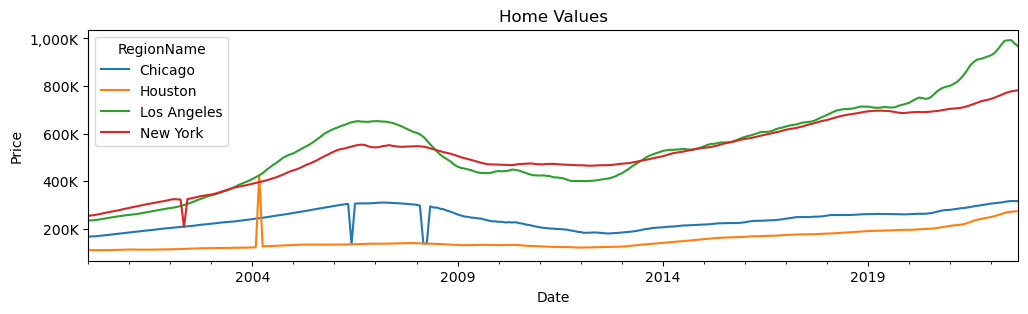

In [11]:
ax=unstacked['value'].plot(figsize=(12,3),title='Home Values')
ax.set_ylabel('Price')
format = mticks.FuncFormatter(k_convert)
ax.yaxis.set_major_formatter(format);

#### Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [12]:
unstacked.loc[pd.IndexSlice['2008'],:].mean()

       RegionName 
value  Chicago        259578.083333
       Houston        135163.083333
       Los Angeles    535684.000000
       New York       530794.166667
dtype: float64

##### At the end of 2008
- **Highest Home Values**: New York, at $530,794.17
  
- **Lowest Home Values**: Houston, at $135,163.08

#### Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [13]:
diff=unstacked.diff()
diff

value                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2000-01-31     NaN     NaN         NaN      NaN
2000-02-29   397.0    11.0       220.0   1827.0
2000-03-31   832.0  -201.0      1112.0   1690.0
2000-04-30  1458.0     3.0      2076.0   3103.0
2000-05-31  1673.0   -47.0      2524.0   2894.0
...            ...     ...         ...      ...
2022-05-31  2838.0  4457.0     17223.0   6476.0
2022-06-30  2176.0  3343.0      1946.0   5147.0
2022-07-31  1247.0  2158.0       293.0   3748.0
2022-08-31  -323.0  1341.0    -14434.0   2268.0
2022-09-30  -158.0   239.0    -11601.0   1662.0

[273 rows x 4 columns]

In [14]:
diff.loc[pd.IndexSlice['12/2008'],:]

value                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-12-31 -5753.0  -964.0    -12611.0  -4458.0

##### Home Value Change From November to December 2008
- **Chicago:** -$5,753.00
  
- **Houston:** -$964.00
  
- **Los Angeles:** -$12,611.00
  
- **New York:** -$4,458.00
  

## Current Project

In [130]:
# updating imports
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm
import itertools
import pmdarima as pm

plt.rcParams['figure.figsize']=(12,3)

### SARIMA Functions

In [16]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [17]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

In [18]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [19]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

### Inspecting / Updating Data

In [40]:
# starting with the timeseries before unstacking
ts.head(3)

,RegionName,value
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0


In [41]:
ts2 = ts[ts['RegionName'] == 'New York']
ts2.head(3)

,RegionName,value
Date,,
2000-01-31,New York,253690.0
2000-02-29,New York,255517.0
2000-03-31,New York,257207.0


In [42]:
ts2 = ts2.drop(columns='RegionName')
ts2.columns

Index(['value'], dtype='object')

In [43]:
ts2 = ts.resample('M').mean()
ts2.head(3)

,value
Date,
2000-01-31,190769.50
2000-02-29,191383.25
2000-03-31,192241.50


In [44]:
ts2 = ts2[(ts2.index > '2017-12-31')]
ts2.head(3)

,value
Date,
2018-01-31,441932.0
2018-02-28,445415.0
2018-03-31,448570.0


In [46]:
# already frontfilled
ts2.isna().sum()

value    0
dtype: int64

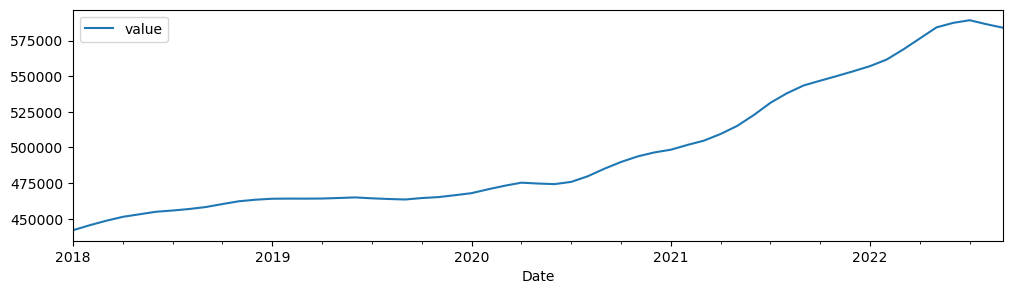

In [49]:
# Visualize the time series
ts2.plot();

### Checking Seasonality

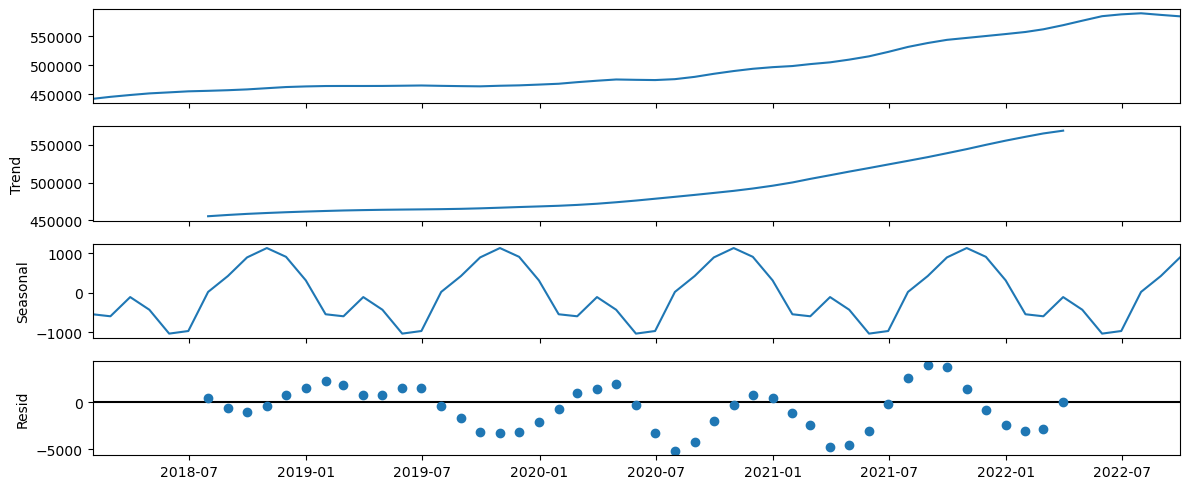

In [50]:
# applying seasonal decomposition per assignment
decomp = tsa.seasonal_decompose(ts2)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [70]:
print(f'max: {ts2.max()}')
print(f'max: {ts2.min()}')

max: value    589322.75
dtype: float64
max: value    441932.0
dtype: float64


In [75]:
tmax = 589322.75
tmin = 441932.0
tper = seasonal_delta/(tmax-tmin) * 100

In [76]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{tper:.2f}% of the variation in time series.")

The seasonal component is 2176.7560763888905 which is ~1.48% of the variation in time series.


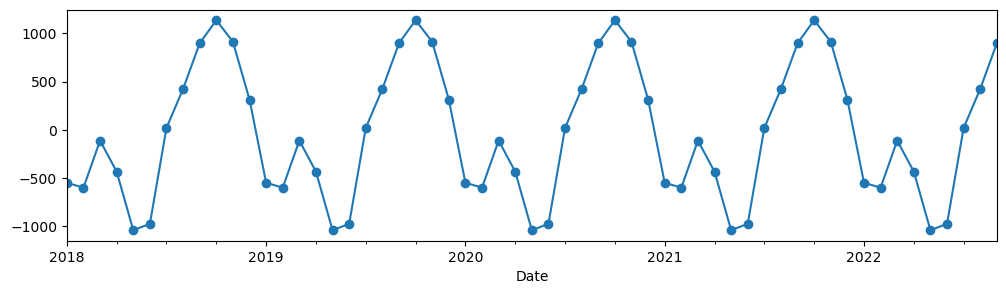

In [85]:
seasonal = decomp.seasonal
ax = seasonal.plot(marker = 'o')

### Determining Time Series Model Orders


##### Stationarity

In [79]:
# determine d
d = ndiffs(ts2)
print (f'd = {d}')

d = 2


In [80]:
# Determine D
D = nsdiffs(ts2, m =12)
print(f'D = {D}')

D = 0


In [81]:
# seasonal differencing is not indicated
ts_diff = ts2.diff().dropna()

##### ACF / PACF Plots

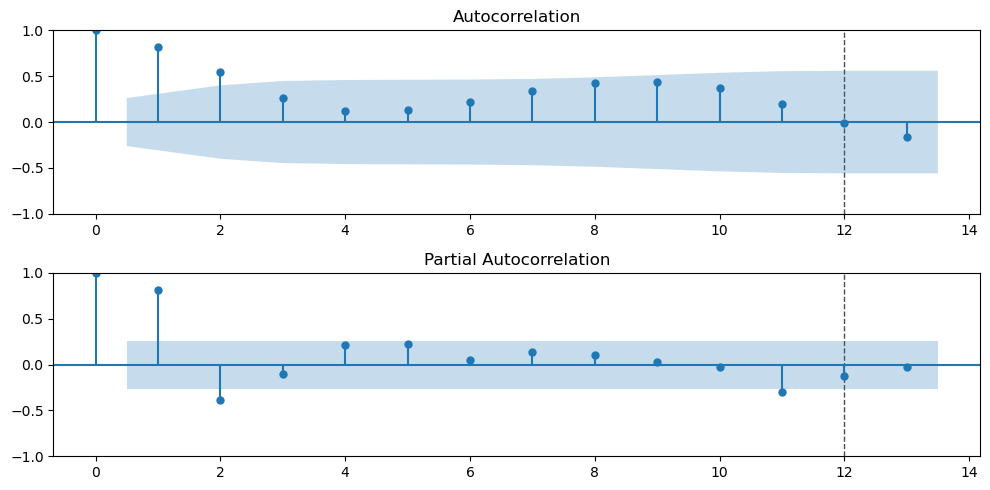

In [83]:
plot_acf_pacf(ts_diff, annotate_seas=True, m = 12, nlags=13);

- Going with AR (p,d,0) because ACF gradually decreases slightly and there is a dramatic drop after lag p in PACF

In [101]:
ts2.shape

(57, 1)

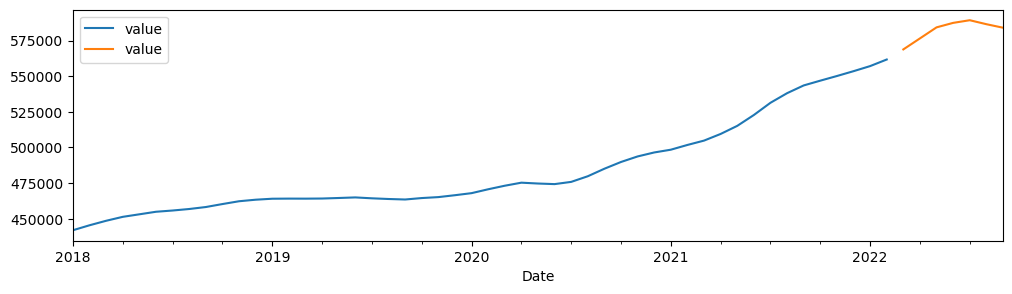

In [102]:
train, test = train_test_split(ts2, test_size=.11)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

### Models

##### Manual Model

In [103]:
# non-seasonal
p = 1
d = 1
q = 1
# seasonal
P = 1
D = 0
Q = 1
m = 12

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10,635.532
- MSE = 132,591,766.374
- RMSE = 11,514.850
- R^2 = -1.945
- MAPE = 1.82%


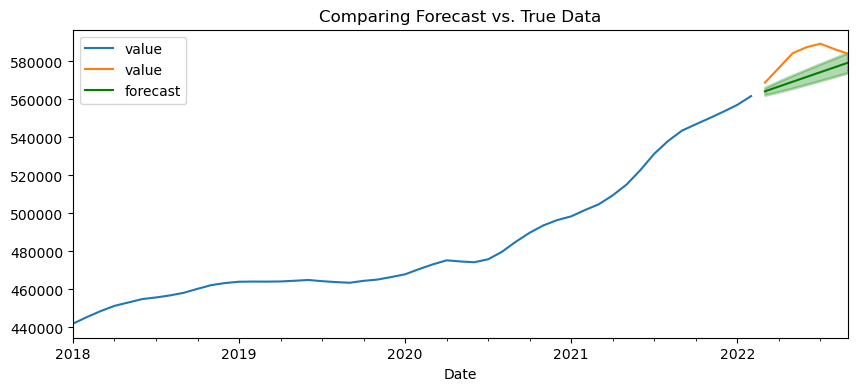

In [104]:
forecast_df = sarima.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df)
regression_metrics_ts(test, forecast_df["mean"])

In [105]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            value   No. Observations:                   50
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -497.300
Date:                          Wed, 01 Nov 2023   AIC                           1004.599
Time:                                  20:55:03   BIC                           1014.058
Sample:                              01-31-2018   HQIC                          1008.188
                                   - 02-28-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.002    563.903      0.000       0.996       1.003
ma.L1         -0.9973      0.009   -109.900      0.000      -1.015      -0.979
ar.S.L12       0.9676      0.452      2.141      0.032       0.082       1.853
ma.S.L12      -0.9720      0.452     -2.152      0.031      -1.857      -0.087
sigma2      9.885e+05   1.18e-06   8.37e+11      0.000    9.88e+05    9.88e+05
===================================================================================
Ljung-Box (L1) (Q):                  39.92   Jarque-Bera (JB):                 4.06
Prob(Q):                              0.00   Prob(JB):                         0.13
Heteroskedasticity (H):               3.79   Skew:                             0.70
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.59e+27. Standard errors may be unstable.
"""

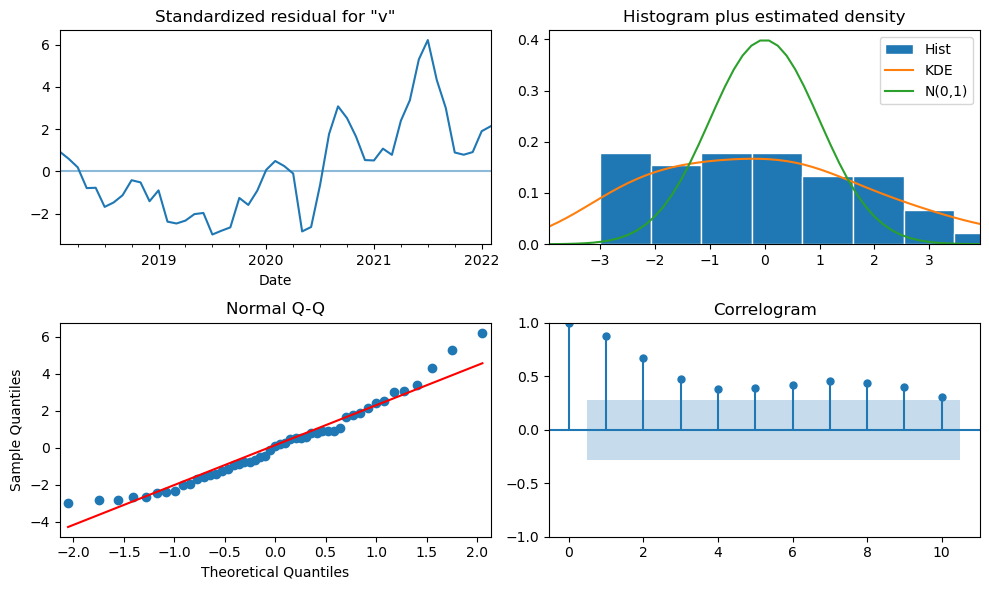

In [106]:
# diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

##### Gridsearch

In [136]:
# auto_arima
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=816.846, Time=0.99 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=805.478, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=809.485, Time=0.08 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=809.241, Time=0.07 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=808.168, Time=0.05 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=807.385, Time=0.09 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=810.953, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=807.596, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=807.341, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=808.799, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=807.453, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.556 seconds


In [141]:
auto_sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order = auto_model.seasonal_order).fit()
auto_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   50
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -401.739
Date:                Wed, 01 Nov 2023   AIC                            805.478
Time:                        21:25:58   BIC                            807.350
Sample:                    01-31-2018   HQIC                           806.186
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.088e+06   2.12e+05      5.132      0.000    6.72e+05     1.5e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.10   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.01   Prob(JB):                         0.96
Heteroskedasticity (H):               5.72   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 5,911.929
- MSE = 42,004,935.143
- RMSE = 6,481.121
- R^2 = 0.067
- MAPE = 1.01%


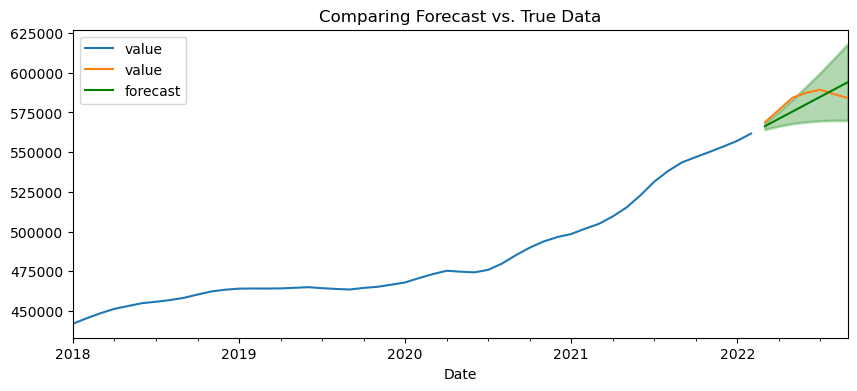

In [142]:
forecast_df = auto_sarima.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df)
regression_metrics_ts(test, forecast_df["mean"])

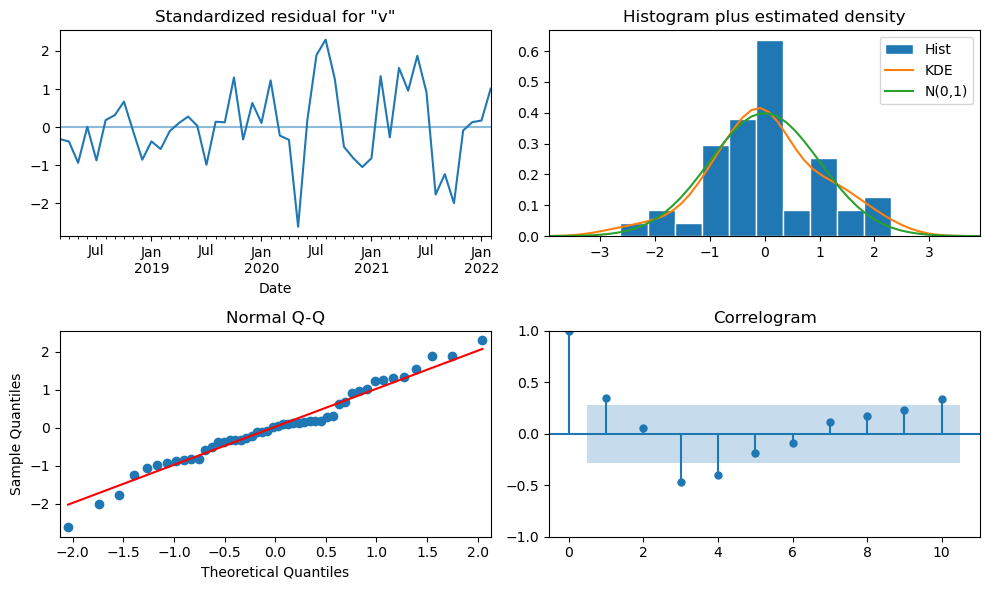

In [143]:
fig = auto_sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- Going with the auto_sarima model as the metrics are better in each category

### Final Model

In [147]:
# defining final model
p = 0 
d = 2 
q = 0 
P = 0 
D = 0 
Q = 0 
m = 12 

final_model = tsa.ARIMA(ts2, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

In [148]:
len(test)

7

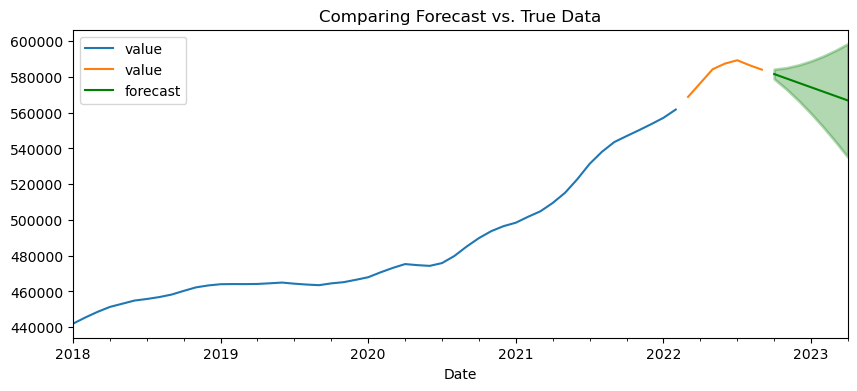

In [149]:
# future forecast
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

In [150]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

581606.75

In [151]:
final_value = forecast_df['mean'].iloc[-1]
final_value

566819.75

In [152]:
change = final_value - starting_value
change

-14787.0

In [153]:
perc_change = (change / starting_value) * 100
perc_change

-2.5424395435575673

### Questions:

##### What is the predicted home value in New York City 6 months into the future (beyond the dataset)?
- $581,606.75

##### What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the dataset)?
- -2.5%